### imports

In [1]:
from algoritmos.otimizacao import *
from algoritmos.genetico import GeneticAlgorithm
import numpy as np
import matplotlib.pyplot as plt

### Utility Functions

In [3]:
def plot_function(f, x_min, x_max, y_min=None, y_max=None):
    if y_min is None:
        y_min = x_min
    if y_max is None:
        y_max = x_max
    figure = plt.figure()
    ax = figure.add_subplot(projection='3d')
    x_axis = np.linspace(x_min, x_max, 100)
    if y_min is None and y_max is None:
        y_axis = x_axis
    else:
        y_axis = np.linspace(y_min, y_max, 100)
    mesh_x, mesh_y = np.meshgrid(x_axis, y_axis)
    ax.plot_surface(mesh_x, mesh_y, f(mesh_x, mesh_y), cmap='viridis')
    
def numpy_mode(data):

    # Index and counts of all elements in the array
    (sorted_data, idx, counts) = np.unique(data, return_index=True, return_counts=True)

    # Index of element with highest count (i.e. the mode)
    index = idx[np.argmax(counts)]-1

    # Return the element with the highest count
    return data[index]

# 1)

## 1. $f(x_1, x_2) = x_1^2 + x_2^2$

In [171]:
def f(x1, x2):
    return x1**2 + x2**2

### Plot

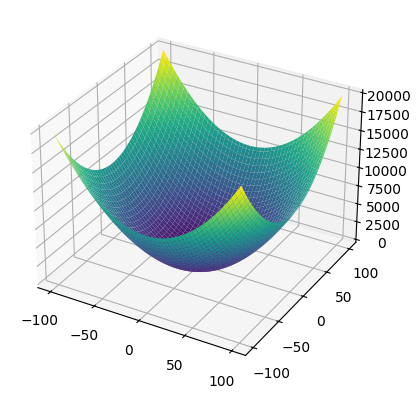

In [159]:
plot_function(f, x_min=-100, x_max=100)

### Hill-Climbing

Moda: 0.01785
Variáveis que geram o resultado da moda: [array([-0.09286991, -0.09605718])]


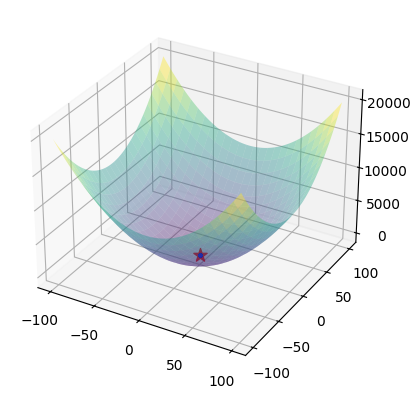

In [117]:
restricoes = np.array([[-100, 100], [-100, 100]])
x_axis = np.linspace(np.min(restricoes),np.max(restricoes),500)
X,Y = np.meshgrid(x_axis,x_axis)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f(X,Y),rstride=20,cstride=20,cmap='viridis',alpha=.4)
rodada = 0
variaveis = []
resultados = []
while rodada < 500:
    hill_climbing = HillClimbing(max_it=1000,epsilon=1,func=f,max_viz=100, restricoes=restricoes, max=False)
    variavel, resultado = hill_climbing.search()
    ax.scatter(variavel[0], variavel[1], f(variavel[0], variavel[1]), c='blue', s=2)
    variaveis.append(variavel)
    resultados.append(resultado)
    
    rodada += 1
resultados_arredondados = np.round(resultados, 5)
mode = numpy_mode(resultados_arredondados)
variaveis_dos_resultados = []
for i, resultado in enumerate(resultados_arredondados):
    if resultado == mode:
        variaveis_dos_resultados.append(variaveis[i])
print(f'Moda: {mode}')
print(f'Variáveis que geram o resultado da moda: {variaveis_dos_resultados}')
ax.scatter(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1], f(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1]), c='red',marker='*', s=100)


### Local Random Search - LRS

Moda: 0.15278
Variáveis que geram o resultado da moda: [array([-0.30841829,  0.24011244])]


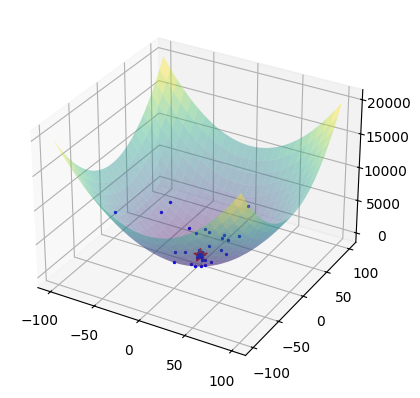

In [118]:
restricoes = np.array([[-100, 100], [-100, 100]])
x_axis = np.linspace(np.min(restricoes),np.max(restricoes),500)
X,Y = np.meshgrid(x_axis,x_axis)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f(X,Y),rstride=20,cstride=20,cmap='viridis',alpha=.4)
rodada = 0
variaveis = []
resultados = []
while rodada < 500:
    lrs = LocalRandomSearch(max_it=1000, sigma=1, func=f, restricoes=np.array([[-100, 100], [-100, 100]]), tolerancia_maxima=10, max=False)
    variavel, resultado = lrs.search()
    ax.scatter(variavel[0], variavel[1], f(variavel[0], variavel[1]), c='blue', s=2)
    variaveis.append(variavel)
    resultados.append(resultado)
    
    rodada += 1
resultados_arredondados = np.round(resultados, 5)
mode = numpy_mode(resultados_arredondados)
variaveis_dos_resultados = []
for i, resultado in enumerate(resultados_arredondados):
    if resultado == mode:
        variaveis_dos_resultados.append(variaveis[i])
print(f'Moda: {mode}')
print(f'Variáveis que geram o resultado da moda: {variaveis_dos_resultados}')
ax.scatter(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1], f(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1]), c='red',marker='*', s=100)


### Global Random Search - GRS

Moda: 7.67965
Variáveis que geram o resultado da moda: [array([2.64000539, 0.8426261 ])]


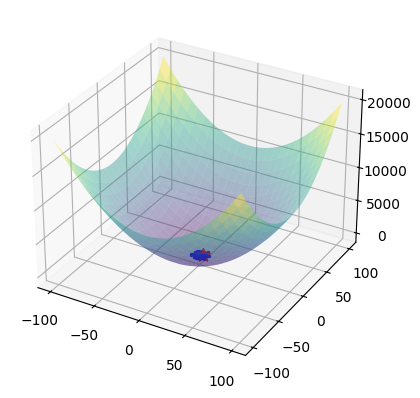

In [177]:
restricoes = np.array([[-100, 100], [-100, 100]])
x_axis = np.linspace(np.min(restricoes),np.max(restricoes),500)
X,Y = np.meshgrid(x_axis,x_axis)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f(X,Y),rstride=20,cstride=20,cmap='viridis',alpha=.4)
rodada = 0
variaveis = []
resultados = []
while rodada < 500:
    grs = GlobalRandomSearch(max_it=1000, func=f, restricoes=np.array([[-100, 100], [-100, 100]]), tolerancia_maxima=10000, max=False)
    variavel, resultado = grs.search()
    ax.scatter(variavel[0], variavel[1], f(variavel[0], variavel[1]), c='blue', s=2)
    variaveis.append(variavel)
    resultados.append(resultado)
    
    rodada += 1
resultados_arredondados = np.round(resultados, 5)
mode = numpy_mode(resultados_arredondados)
variaveis_dos_resultados = []
for i, resultado in enumerate(resultados_arredondados):
    if resultado == mode:
        variaveis_dos_resultados.append(variaveis[i])
print(f'Moda: {mode}')
print(f'Variáveis que geram o resultado da moda: {variaveis_dos_resultados}')
ax.scatter(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1], f(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1]), c='red',marker='*', s=100)


## 2. $f(x_1, x_2) = e^{(x_2 - 1 + x_2^2)} + 2e^{(x_1 - 17)^2 + (x_2 - 17)^2}$

In [120]:
def f(x1, x2):
    return np.exp(-(x1**2 + x2**2)) + 2 * np.exp(-((x1 - 1.7)**2 + (x2 - 1.7)**2))

### Plot Function

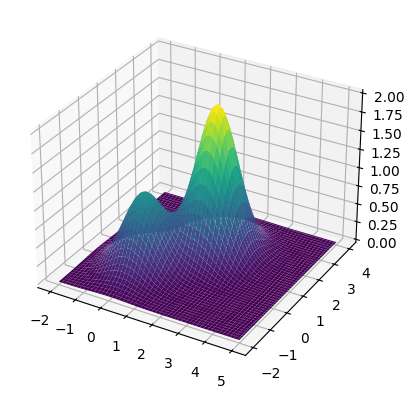

In [182]:
plot_function(f, x_min=-2, x_max=5, y_min=-2, y_max=4)

### Hill-Climbing

Moda: 1.00319
Variáveis que geram o resultado da moda: [array([ 0.03510499, -0.04040617])]


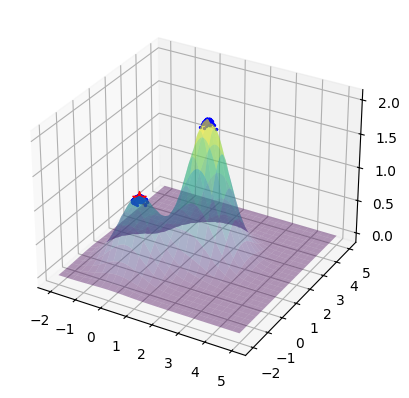

In [123]:
restricoes = np.array([[-2, 4], [-2, 5]])
x_axis = np.linspace(np.min(restricoes),np.max(restricoes),500)
X,Y = np.meshgrid(x_axis,x_axis)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f(X,Y),rstride=20,cstride=20,cmap='viridis',alpha=.4)
rodada = 0
variaveis = []
resultados = []
while rodada < 500:
    hill_climbing = HillClimbing(max_it=1000,epsilon=1,func=f,max_viz=50, restricoes=restricoes, max=True)
    variavel, resultado = hill_climbing.search()
    ax.scatter(variavel[0], variavel[1], f(variavel[0], variavel[1]), c='blue', s=2)
    variaveis.append(variavel)
    resultados.append(resultado)
    
    rodada += 1
resultados_arredondados = np.round(resultados, 5)
mode = numpy_mode(resultados_arredondados)
variaveis_dos_resultados = []
for i, resultado in enumerate(resultados_arredondados):
    if resultado == mode:
        variaveis_dos_resultados.append(variaveis[i])
print(f'Moda: {mode}')
print(f'Variáveis que geram o resultado da moda: {variaveis_dos_resultados}')
ax.scatter(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1], f(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1]), c='red',marker='*', s=100)


### Local Random Search - LRS

Moda: 1.0064
Variáveis que geram o resultado da moda: [array([0.01402239, 0.01309853]), array([0.01355376, 0.00860528]), array([0.01286057, 0.00852866]), array([0.00922023, 0.00771262]), array([0.01200003, 0.00697047]), array([0.00761242, 0.0105749 ]), array([0.00777868, 0.01310703]), array([0.00921081, 0.00853938]), array([0.00770094, 0.01368286]), array([0.00839527, 0.01259506]), array([0.0083256 , 0.01003037]), array([0.01385349, 0.00858663]), array([0.00777524, 0.01258925]), array([0.00938045, 0.01415105]), array([0.01176915, 0.01426575]), array([0.00968418, 0.00780774]), array([0.01469851, 0.01191665]), array([0.00946458, 0.01367625]), array([0.00909263, 0.0089265 ]), array([0.01047753, 0.01423289]), array([0.00912996, 0.01444483]), array([0.01471707, 0.01343726]), array([0.00876396, 0.01360823]), array([0.01017114, 0.01472296]), array([0.01385634, 0.00907579]), array([0.01470349, 0.01085917]), array([0.01268687, 0.01447205]), array([0.00881168, 0.00852287]), array([0.00885329, 0.

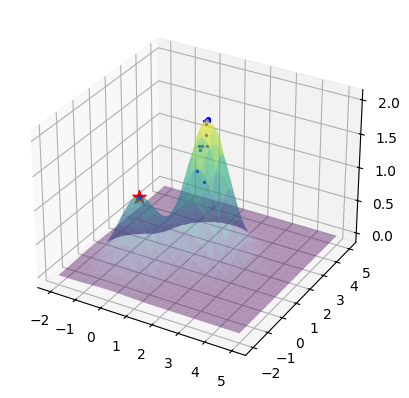

In [124]:
restricoes = np.array([[-2, 4], [-2, 5]])
x_axis = np.linspace(np.min(restricoes),np.max(restricoes),500)
X,Y = np.meshgrid(x_axis,x_axis)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f(X,Y),rstride=20,cstride=20,cmap='viridis',alpha=.4)
rodada = 0
variaveis = []
resultados = []
while rodada < 500:
    lrs = LocalRandomSearch(max_it=1000, sigma=0.01, func=f, restricoes=restricoes, tolerancia_maxima=15, max=True)
    variavel, resultado = lrs.search()
    ax.scatter(variavel[0], variavel[1], f(variavel[0], variavel[1]), c='blue', s=2)
    variaveis.append(variavel)
    resultados.append(resultado)
    
    rodada += 1
resultados_arredondados = np.round(resultados, 5)
mode = numpy_mode(resultados_arredondados)
variaveis_dos_resultados = []
for i, resultado in enumerate(resultados_arredondados):
    if resultado == mode:
        variaveis_dos_resultados.append(variaveis[i])
print(f'Moda: {mode}')
print(f'Variáveis que geram o resultado da moda: {variaveis_dos_resultados}')
ax.scatter(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1], f(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1]), c='red',marker='*', s=100)


### Global Random Search - GRS

Moda: 1.992
Variáveis que geram o resultado da moda: [array([1.73557931, 1.76204608])]


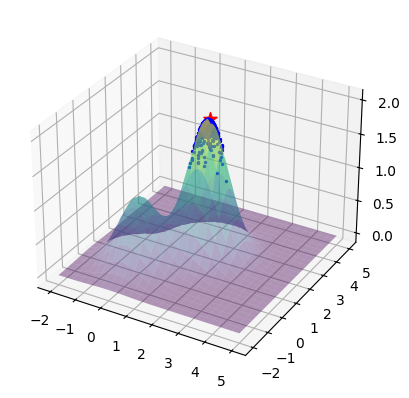

In [126]:
restricoes = np.array([[-2, 4], [-2, 5]])
x_axis = np.linspace(np.min(restricoes),np.max(restricoes),500)
X,Y = np.meshgrid(x_axis,x_axis)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f(X,Y),rstride=20,cstride=20,cmap='viridis',alpha=.4)
rodada = 0
variaveis = []
resultados = []
while rodada < 500:
    grs = GlobalRandomSearch(max_it=1000, func=f, restricoes=restricoes, tolerancia_maxima=100, max=True)
    variavel, resultado = grs.search()
    ax.scatter(variavel[0], variavel[1], f(variavel[0], variavel[1]), c='blue', s=2)
    variaveis.append(variavel)
    resultados.append(resultado)
    
    rodada += 1
resultados_arredondados = np.round(resultados, 5)
mode = numpy_mode(resultados_arredondados)
variaveis_dos_resultados = []
for i, resultado in enumerate(resultados_arredondados):
    if resultado == mode:
        variaveis_dos_resultados.append(variaveis[i])
print(f'Moda: {mode}')
print(f'Variáveis que geram o resultado da moda: {variaveis_dos_resultados}')
ax.scatter(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1], f(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1]), c='red',marker='*', s=100)


## 3. $f(x_1, x_2) = -20 \cdot e^{-0.2 \cdot \sqrt{0.5(x_1^2 + x_2^2)}} - e^{0.5(\cos(2\pi x_1) + \cos(2\pi x_2))} + 20 + e$

In [133]:
def f(x1, x2):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x1**2 + x2**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2))) + 20 + np.exp(1)

### Plot Function

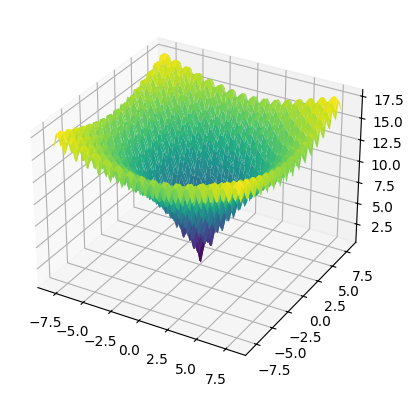

In [266]:
plot_function(f, -8, 8)

### Hill-Climbing

Moda: 11.57423
Variáveis que geram o resultado da moda: [array([-3.10337718, -5.00980806])]


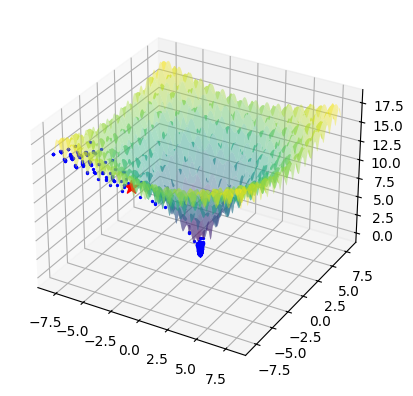

In [131]:
restricoes = np.array([[-8, 8], [-8, 8]])
x_axis = np.linspace(np.min(restricoes),np.max(restricoes),500)
X,Y = np.meshgrid(x_axis,x_axis)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f(X,Y),rstride=20,cstride=20,cmap='viridis',alpha=.4)
rodada = 0
variaveis = []
resultados = []
while rodada < 500:
    hill_climbing = HillClimbing(max_it=1000,epsilon=1,func=f,max_viz=50, restricoes=restricoes, max=False)
    variavel, resultado = hill_climbing.search()
    ax.scatter(variavel[0], variavel[1], f(variavel[0], variavel[1]), c='blue', s=2)
    variaveis.append(variavel)
    resultados.append(resultado)
    
    rodada += 1
resultados_arredondados = np.round(resultados, 5)
mode = numpy_mode(resultados_arredondados)
variaveis_dos_resultados = []
for i, resultado in enumerate(resultados_arredondados):
    if resultado == mode:
        variaveis_dos_resultados.append(variaveis[i])
print(f'Moda: {mode}')
print(f'Variáveis que geram o resultado da moda: {variaveis_dos_resultados}')
ax.scatter(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1], f(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1]), c='red',marker='*', s=100)


### Local Random Search - LRS

Moda: 10.26005
Variáveis que geram o resultado da moda: [array([-1.00370984, -4.97382927])]


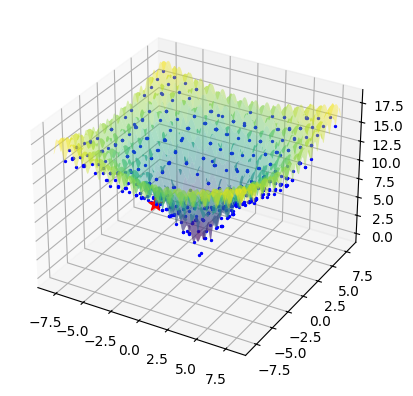

In [134]:
restricoes = np.array([[-8, 8], [-8, 8]])
x_axis = np.linspace(np.min(restricoes),np.max(restricoes),500)
X,Y = np.meshgrid(x_axis,x_axis)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f(X,Y),rstride=20,cstride=20,cmap='viridis',alpha=.4)
rodada = 0
variaveis = []
resultados = []
while rodada < 500:
    lrs = LocalRandomSearch(max_it=1000, sigma=0.1, func=f, restricoes=restricoes, tolerancia_maxima=10, max=False)
    variavel, resultado = lrs.search()
    ax.scatter(variavel[0], variavel[1], f(variavel[0], variavel[1]), c='blue', s=2)
    variaveis.append(variavel)
    resultados.append(resultado)
    
    rodada += 1
resultados_arredondados = np.round(resultados, 5)
mode = numpy_mode(resultados_arredondados)
variaveis_dos_resultados = []
for i, resultado in enumerate(resultados_arredondados):
    if resultado == mode:
        variaveis_dos_resultados.append(variaveis[i])
print(f'Moda: {mode}')
print(f'Variáveis que geram o resultado da moda: {variaveis_dos_resultados}')
ax.scatter(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1], f(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1]), c='red',marker='*', s=100)


### Global Random Search - GRS

Moda: 3.42786
Variáveis que geram o resultado da moda: [array([-0.19958576, -0.88353484])]


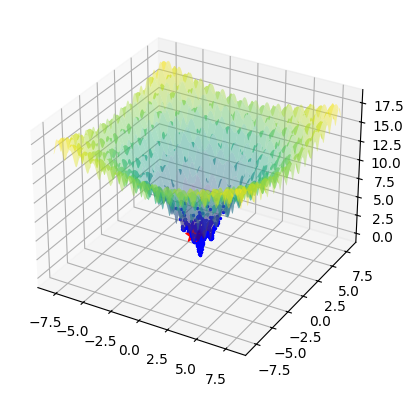

In [135]:
restricoes = np.array([[-8, 8], [-8, 8]])
x_axis = np.linspace(np.min(restricoes),np.max(restricoes),500)
X,Y = np.meshgrid(x_axis,x_axis)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f(X,Y),rstride=20,cstride=20,cmap='viridis',alpha=.4)
rodada = 0
variaveis = []
resultados = []
while rodada < 500:
    grs = GlobalRandomSearch(max_it=1000, func=f, restricoes=restricoes, tolerancia_maxima=100, max=False)
    variavel, resultado = grs.search()
    ax.scatter(variavel[0], variavel[1], f(variavel[0], variavel[1]), c='blue', s=2)
    variaveis.append(variavel)
    resultados.append(resultado)
    
    rodada += 1
resultados_arredondados = np.round(resultados, 5)
mode = numpy_mode(resultados_arredondados)
variaveis_dos_resultados = []
for i, resultado in enumerate(resultados_arredondados):
    if resultado == mode:
        variaveis_dos_resultados.append(variaveis[i])
print(f'Moda: {mode}')
print(f'Variáveis que geram o resultado da moda: {variaveis_dos_resultados}')
ax.scatter(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1], f(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1]), c='red',marker='*', s=100)


## 4. $f(x_1, x_2) = (x_1^2 - 10 \cdot \cos(2\pi x_1) + 10) + (x_2^2 - 10 \cdot \cos(2\pi x_2) + 10)$

In [136]:
def f(x1, x2):
    return (x1**2 - 10 * np.cos(2 * np.pi * x1) + 10) + (x2**2 - 10 * np.cos(2 * np.pi * x2) + 10)

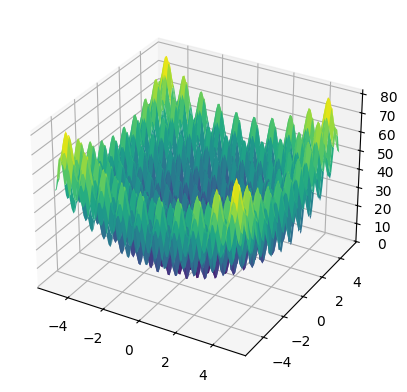

In [237]:
plot_function(f, -5, 5)

### Hill-Climbing

Moda: 80.08536
Variáveis que geram o resultado da moda: [array([-4.49459624, -4.57240827])]


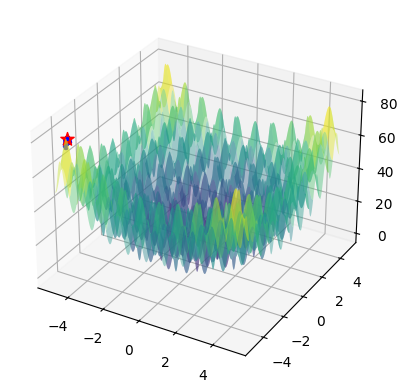

In [139]:
restricoes = np.array([[-5, 5], [-5, 5]])
x_axis = np.linspace(np.min(restricoes),np.max(restricoes),500)
X,Y = np.meshgrid(x_axis,x_axis)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f(X,Y),rstride=20,cstride=20,cmap='viridis',alpha=.4)
rodada = 0
variaveis = []
resultados = []
while rodada < 500:
    hill_climbing = HillClimbing(max_it=1000,epsilon=0.5,func=f,max_viz=50, restricoes=restricoes, max=True)
    variavel, resultado = hill_climbing.search()
    ax.scatter(variavel[0], variavel[1], f(variavel[0], variavel[1]), c='blue', s=2)
    variaveis.append(variavel)
    resultados.append(resultado)
    
    rodada += 1
resultados_arredondados = np.round(resultados, 5)
mode = numpy_mode(resultados_arredondados)
variaveis_dos_resultados = []
for i, resultado in enumerate(resultados_arredondados):
    if resultado == mode:
        variaveis_dos_resultados.append(variaveis[i])
print(f'Moda: {mode}')
print(f'Variáveis que geram o resultado da moda: {variaveis_dos_resultados}')
ax.scatter(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1], f(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1]), c='red',marker='*', s=100)

### Local Random Search - LRS

Moda: 53.98167
Variáveis que geram o resultado da moda: [array([-1.56051604, -3.53418361])]


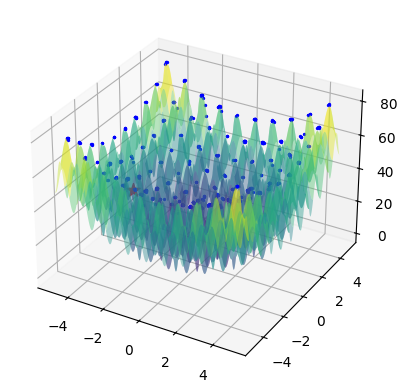

In [141]:
restricoes = np.array([[-5, 5], [-5, 5]])
x_axis = np.linspace(np.min(restricoes),np.max(restricoes),500)
X,Y = np.meshgrid(x_axis,x_axis)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f(X,Y),rstride=20,cstride=20,cmap='viridis',alpha=.4)
rodada = 0
variaveis = []
resultados = []
while rodada < 500:
    lrs = LocalRandomSearch(max_it=1000, sigma=0.1, func=f, restricoes=restricoes, tolerancia_maxima=10, max=True)
    variavel, resultado = lrs.search()
    ax.scatter(variavel[0], variavel[1], f(variavel[0], variavel[1]), c='blue', s=2)
    variaveis.append(variavel)
    resultados.append(resultado)
    
    rodada += 1
resultados_arredondados = np.round(resultados, 5)
mode = numpy_mode(resultados_arredondados)
variaveis_dos_resultados = []
for i, resultado in enumerate(resultados_arredondados):
    if resultado == mode:
        variaveis_dos_resultados.append(variaveis[i])
print(f'Moda: {mode}')
print(f'Variáveis que geram o resultado da moda: {variaveis_dos_resultados}')
ax.scatter(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1], f(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1]), c='red',marker='*', s=100)


### Global Random Search - GRS

Moda: 80.32657
Variáveis que geram o resultado da moda: [array([-4.55315641, -4.49058962])]


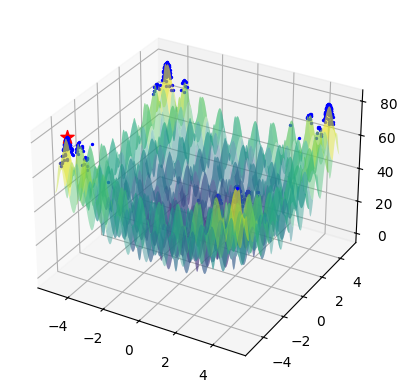

In [142]:
restricoes = np.array([[-5, 5], [-5, 5]])
x_axis = np.linspace(np.min(restricoes),np.max(restricoes),500)
X,Y = np.meshgrid(x_axis,x_axis)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f(X,Y),rstride=20,cstride=20,cmap='viridis',alpha=.4)
rodada = 0
variaveis = []
resultados = []
while rodada < 500:
    grs = GlobalRandomSearch(max_it=1000, func=f, restricoes=restricoes, tolerancia_maxima=100, max=True)
    variavel, resultado = grs.search()
    ax.scatter(variavel[0], variavel[1], f(variavel[0], variavel[1]), c='blue', s=2)
    variaveis.append(variavel)
    resultados.append(resultado)
    
    rodada += 1
resultados_arredondados = np.round(resultados, 5)
mode = numpy_mode(resultados_arredondados)
variaveis_dos_resultados = []
for i, resultado in enumerate(resultados_arredondados):
    if resultado == mode:
        variaveis_dos_resultados.append(variaveis[i])
print(f'Moda: {mode}')
print(f'Variáveis que geram o resultado da moda: {variaveis_dos_resultados}')
ax.scatter(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1], f(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1]), c='red',marker='*', s=100)


## 5. $f(x_1, x_2) = \frac{x_1 \cdot \cos(x_1)}{20} + 2 \cdot e^{(-x_1^2 - (x_2 - 1)^2)} + 0{,}01 \cdot x_1 \cdot x_2$

In [143]:
def f(x1, x2):
    return (x1 * np.cos(x1)) / 20 + 2 * np.exp(-(x1**2) - (x2 - 1)**2) + 0.01 * x1 * x2

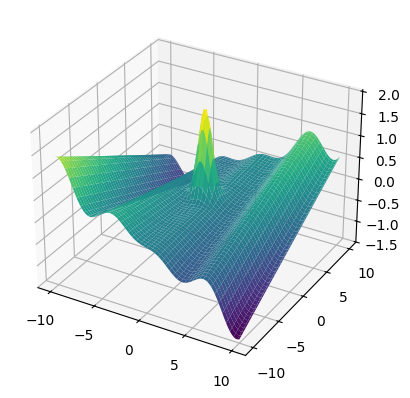

In [233]:
plot_function(f, -10, 10)

### Hill-Climbing

Moda: 1.43702
Variáveis que geram o resultado da moda: [array([ -9.73295507, -10.        ]), array([ -9.73308436, -10.        ]), array([ -9.73493792, -10.        ]), array([ -9.73361941, -10.        ]), array([ -9.732121, -10.      ]), array([ -9.73416799, -10.        ]), array([ -9.73161463, -10.        ]), array([ -9.7311864, -10.       ]), array([ -9.73358623, -10.        ]), array([ -9.73331192, -10.        ]), array([ -9.73414375, -10.        ]), array([ -9.73335706, -10.        ]), array([ -9.73328686, -10.        ]), array([ -9.73297151, -10.        ]), array([ -9.7324532, -10.       ]), array([ -9.73116424, -10.        ]), array([ -9.73118201, -10.        ]), array([ -9.73399284, -10.        ]), array([ -9.73478646, -10.        ]), array([ -9.7344529, -10.       ]), array([ -9.73305676, -10.        ]), array([ -9.73277164, -10.        ]), array([ -9.73137099, -10.        ]), array([ -9.73494979, -10.        ]), array([ -9.73249301, -10.        ]), array([ -9.73329361, -10.    

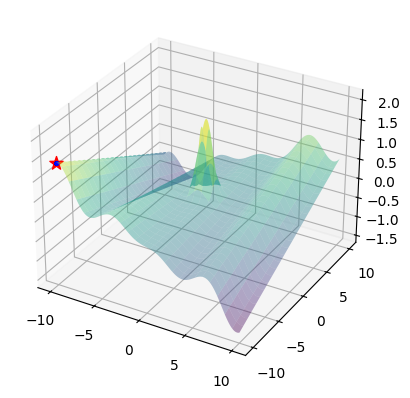

In [149]:
restricoes = np.array([[-10, 10], [-10, 10]])
x_axis = np.linspace(np.min(restricoes),np.max(restricoes),500)
X,Y = np.meshgrid(x_axis,x_axis)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f(X,Y),rstride=20,cstride=20,cmap='viridis',alpha=.4)
rodada = 0
variaveis = []
resultados = []
while rodada < 500:
    hill_climbing = HillClimbing(max_it=1000,epsilon=1,func=f,max_viz=50, restricoes=restricoes, max=True)
    variavel, resultado = hill_climbing.search()
    ax.scatter(variavel[0], variavel[1], f(variavel[0], variavel[1]), c='blue', s=2)
    variaveis.append(variavel)
    resultados.append(resultado)
    
    rodada += 1
resultados_arredondados = np.round(resultados, 5)
mode = numpy_mode(resultados_arredondados)
variaveis_dos_resultados = []
for i, resultado in enumerate(resultados_arredondados):
    if resultado == mode:
        variaveis_dos_resultados.append(variaveis[i])
print(f'Moda: {mode}')
print(f'Variáveis que geram o resultado da moda: {variaveis_dos_resultados}')
ax.scatter(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1], f(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1]), c='red',marker='*', s=100)


### Local Random Search - LRS

Moda: 0.75318
Variáveis que geram o resultado da moda: [array([6.79079461, 6.72164712])]


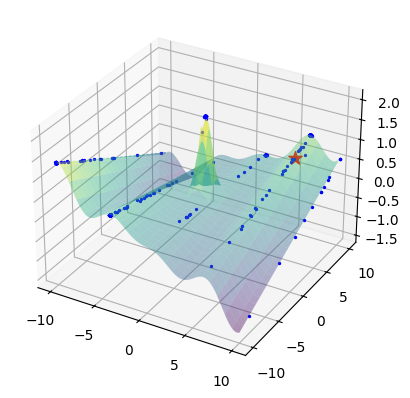

In [150]:
restricoes = np.array([[-10, 10], [-10, 10]])
x_axis = np.linspace(np.min(restricoes),np.max(restricoes),500)
X,Y = np.meshgrid(x_axis,x_axis)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f(X,Y),rstride=20,cstride=20,cmap='viridis',alpha=.4)
rodada = 0
variaveis = []
resultados = []
while rodada < 500:
    lrs = LocalRandomSearch(max_it=1000, sigma=0.1, func=f, restricoes=restricoes, tolerancia_maxima=10, max=True)
    variavel, resultado = lrs.search()
    ax.scatter(variavel[0], variavel[1], f(variavel[0], variavel[1]), c='blue', s=2)
    variaveis.append(variavel)
    resultados.append(resultado)
    
    rodada += 1
resultados_arredondados = np.round(resultados, 5)
mode = numpy_mode(resultados_arredondados)
variaveis_dos_resultados = []
for i, resultado in enumerate(resultados_arredondados):
    if resultado == mode:
        variaveis_dos_resultados.append(variaveis[i])
print(f'Moda: {mode}')
print(f'Variáveis que geram o resultado da moda: {variaveis_dos_resultados}')
ax.scatter(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1], f(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1]), c='red',marker='*', s=100)


### Global Random Search - GRS

Moda: 1.96315
Variáveis que geram o resultado da moda: [array([0.13805647, 0.93925661])]


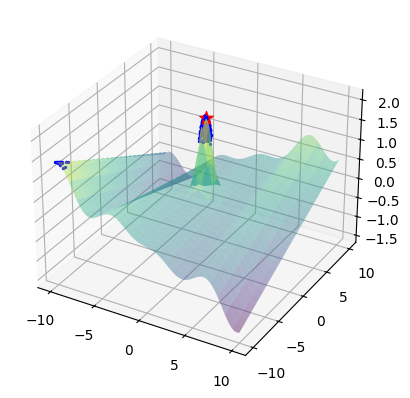

In [151]:
restricoes = np.array([[-10, 10], [-10, 10]])
x_axis = np.linspace(np.min(restricoes),np.max(restricoes),500)
X,Y = np.meshgrid(x_axis,x_axis)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f(X,Y),rstride=20,cstride=20,cmap='viridis',alpha=.4)
rodada = 0
variaveis = []
resultados = []
while rodada < 500:
    lrs = GlobalRandomSearch(max_it=1000, func=f, restricoes=restricoes, tolerancia_maxima=1000, max=True)
    variavel, resultado = lrs.search()
    ax.scatter(variavel[0], variavel[1], f(variavel[0], variavel[1]), c='blue', s=2)
    variaveis.append(variavel)
    resultados.append(resultado)
    
    rodada += 1
resultados_arredondados = np.round(resultados, 5)
mode = numpy_mode(resultados_arredondados)
variaveis_dos_resultados = []
for i, resultado in enumerate(resultados_arredondados):
    if resultado == mode:
        variaveis_dos_resultados.append(variaveis[i])
print(f'Moda: {mode}')
print(f'Variáveis que geram o resultado da moda: {variaveis_dos_resultados}')
ax.scatter(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1], f(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1]), c='red',marker='*', s=100)


## 6. $f(x_1, x_2) = x_1 \cdot \sin(4\pi x_1) - x_2 \cdot \sin(4\pi x_2 + \pi) + 1$

In [152]:
def f(x1, x2):
    return x1 * np.sin(4 * np.pi * x1) - x2 * np.sin(4 * np.pi * x2 + np.pi) + 1

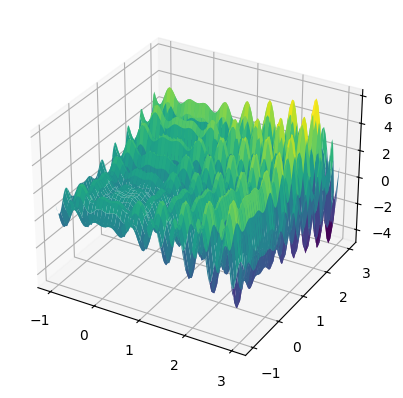

In [239]:
plot_function(f, -1, 3)

### Hill-Climbing

Moda: 2.02625
Variáveis que geram o resultado da moda: [array([-0.56489469, -0.61762156])]


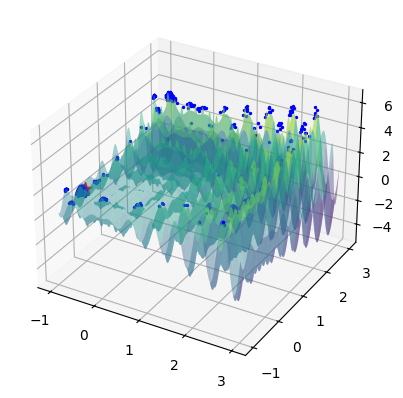

In [155]:
restricoes = np.array([[-1, 3], [-1, 3]])
x_axis = np.linspace(np.min(restricoes),np.max(restricoes),500)
X,Y = np.meshgrid(x_axis,x_axis)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f(X,Y),rstride=20,cstride=20,cmap='viridis',alpha=.4)
rodada = 0
variaveis = []
resultados = []
while rodada < 500:
    hill_climbing = HillClimbing(max_it=1000,epsilon=1,func=f,max_viz=50, restricoes=restricoes, max=True)
    variavel, resultado = hill_climbing.search()
    ax.scatter(variavel[0], variavel[1], f(variavel[0], variavel[1]), c='blue', s=2)
    variaveis.append(variavel)
    resultados.append(resultado)
    
    rodada += 1
resultados_arredondados = np.round(resultados, 5)
mode = numpy_mode(resultados_arredondados)
variaveis_dos_resultados = []
for i, resultado in enumerate(resultados_arredondados):
    if resultado == mode:
        variaveis_dos_resultados.append(variaveis[i])
print(f'Moda: {mode}')
print(f'Variáveis que geram o resultado da moda: {variaveis_dos_resultados}')
ax.scatter(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1], f(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1]), c='red',marker='*', s=100)


### Local Random Search - LRS

Moda: 1.27504
Variáveis que geram o resultado da moda: [array([0.18787085, 0.15044204])]


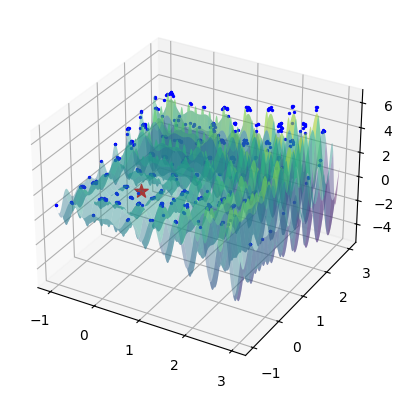

In [156]:
restricoes = np.array([[-1, 3], [-1, 3]])
x_axis = np.linspace(np.min(restricoes),np.max(restricoes),500)
X,Y = np.meshgrid(x_axis,x_axis)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f(X,Y),rstride=20,cstride=20,cmap='viridis',alpha=.4)
rodada = 0
variaveis = []
resultados = []
while rodada < 500:
    lrs = LocalRandomSearch(max_it=1000, sigma=0.1, func=f, restricoes=restricoes, tolerancia_maxima=10, max=True)
    variavel, resultado = lrs.search()
    ax.scatter(variavel[0], variavel[1], f(variavel[0], variavel[1]), c='blue', s=2)
    variaveis.append(variavel)
    resultados.append(resultado)
    
    rodada += 1
resultados_arredondados = np.round(resultados, 5)
mode = numpy_mode(resultados_arredondados)
variaveis_dos_resultados = []
for i, resultado in enumerate(resultados_arredondados):
    if resultado == mode:
        variaveis_dos_resultados.append(variaveis[i])
print(f'Moda: {mode}')
print(f'Variáveis que geram o resultado da moda: {variaveis_dos_resultados}')
ax.scatter(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1], f(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1]), c='red',marker='*', s=100)


### Global Random Search - GRS

Moda: 6.12169
Variáveis que geram o resultado da moda: [array([2.60260189, 2.62264439])]


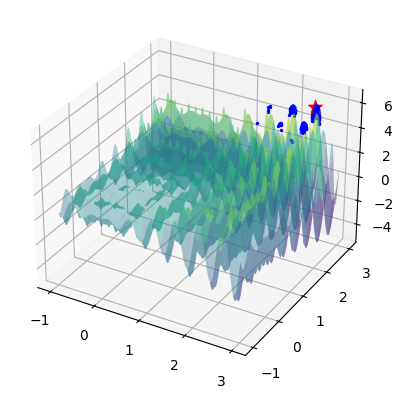

In [157]:
restricoes = np.array([[-1, 3], [-1, 3]])
x_axis = np.linspace(np.min(restricoes),np.max(restricoes),500)
X,Y = np.meshgrid(x_axis,x_axis)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f(X,Y),rstride=20,cstride=20,cmap='viridis',alpha=.4)
rodada = 0
variaveis = []
resultados = []
while rodada < 500:
    grs = GlobalRandomSearch(max_it=1000, func=f, restricoes=restricoes, tolerancia_maxima=1000, max=True)
    variavel, resultado = grs.search()
    ax.scatter(variavel[0], variavel[1], f(variavel[0], variavel[1]), c='blue', s=2)
    variaveis.append(variavel)
    resultados.append(resultado)
    
    rodada += 1
resultados_arredondados = np.round(resultados, 5)
mode = numpy_mode(resultados_arredondados)
variaveis_dos_resultados = []
for i, resultado in enumerate(resultados_arredondados):
    if resultado == mode:
        variaveis_dos_resultados.append(variaveis[i])
print(f'Moda: {mode}')
print(f'Variáveis que geram o resultado da moda: {variaveis_dos_resultados}')
ax.scatter(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1], f(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1]), c='red',marker='*', s=100)


## 7. $f(x_1, x_2) = -\sin(x_1) \cdot \sin\left(\frac{x_1^2}{\pi}\right)^{20} - \sin(x_2) \cdot \sin\left(\frac{2x_2^2}{\pi}\right)^{20}$

In [158]:
def f(x1, x2):
    return -np.sin(x1) * np.sin((x1**2 / np.pi))**20 - np.sin(x2) * np.sin(((2 * x2**2) / np.pi))**20

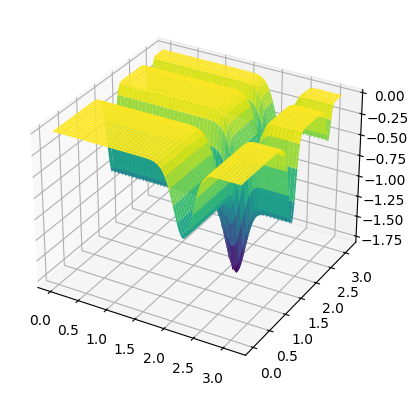

In [250]:
plot_function(f, 0, np.pi)

### Hill-Climbing

Moda: -0.80124
Variáveis que geram o resultado da moda: [array([2.20492438, 0.21095584]), array([2.20483448, 0.2612424 ]), array([2.20485465, 0.59782608]), array([2.20088407, 0.35640638])]


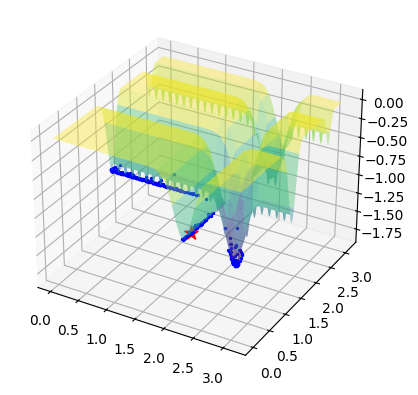

In [161]:
restricoes = np.array([[0, np.pi], [0, np.pi]])
x_axis = np.linspace(np.min(restricoes),np.max(restricoes),500)
X,Y = np.meshgrid(x_axis,x_axis)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f(X,Y),rstride=20,cstride=20,cmap='viridis',alpha=.4)
rodada = 0
variaveis = []
resultados = []
while rodada < 500:
    hill_climbing = HillClimbing(max_it=1000,epsilon=0.5,func=f,max_viz=50, restricoes=restricoes, max=False)
    variavel, resultado = hill_climbing.search()
    ax.scatter(variavel[0], variavel[1], f(variavel[0], variavel[1]), c='blue', s=2)
    variaveis.append(variavel)
    resultados.append(resultado)
    
    rodada += 1
resultados_arredondados = np.round(resultados, 5)
mode = numpy_mode(resultados_arredondados)
variaveis_dos_resultados = []
for i, resultado in enumerate(resultados_arredondados):
    if resultado == mode:
        variaveis_dos_resultados.append(variaveis[i])
print(f'Moda: {mode}')
print(f'Variáveis que geram o resultado da moda: {variaveis_dos_resultados}')
ax.scatter(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1], f(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1]), c='red',marker='*', s=100)


### Local Random Search - LRS

Moda: -0.41271
Variáveis que geram o resultado da moda: [array([0.95609229, 2.71063975]), array([2.77815057, 2.71030059])]


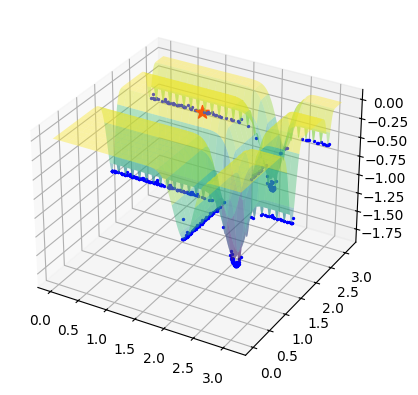

In [162]:
restricoes = np.array([[0, np.pi], [0, np.pi]])
x_axis = np.linspace(np.min(restricoes),np.max(restricoes),500)
X,Y = np.meshgrid(x_axis,x_axis)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f(X,Y),rstride=20,cstride=20,cmap='viridis',alpha=.4)
rodada = 0
variaveis = []
resultados = []
while rodada < 500:
    lrs = LocalRandomSearch(max_it=1000, sigma=0.1, func=f, restricoes=restricoes, tolerancia_maxima=10, max=False)
    variavel, resultado = lrs.search()
    ax.scatter(variavel[0], variavel[1], f(variavel[0], variavel[1]), c='blue', s=2)
    variaveis.append(variavel)
    resultados.append(resultado)
    
    rodada += 1
resultados_arredondados = np.round(resultados, 5)
mode = numpy_mode(resultados_arredondados)
variaveis_dos_resultados = []
for i, resultado in enumerate(resultados_arredondados):
    if resultado == mode:
        variaveis_dos_resultados.append(variaveis[i])
print(f'Moda: {mode}')
print(f'Variáveis que geram o resultado da moda: {variaveis_dos_resultados}')
ax.scatter(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1], f(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1]), c='red',marker='*', s=100)


### Global Random Search - GRS

Moda: -1.7712
Variáveis que geram o resultado da moda: [array([2.19701123, 1.54335779])]


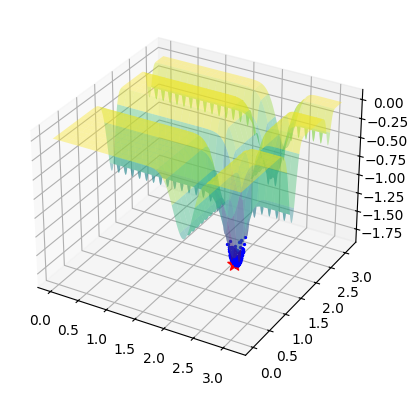

In [163]:
restricoes = np.array([[0, np.pi], [0, np.pi]])
x_axis = np.linspace(np.min(restricoes),np.max(restricoes),500)
X,Y = np.meshgrid(x_axis,x_axis)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f(X,Y),rstride=20,cstride=20,cmap='viridis',alpha=.4)
rodada = 0
variaveis = []
resultados = []
while rodada < 500:
    grs = GlobalRandomSearch(max_it=1000, func=f, restricoes=restricoes, tolerancia_maxima=1000, max=False)
    variavel, resultado = grs.search()
    ax.scatter(variavel[0], variavel[1], f(variavel[0], variavel[1]), c='blue', s=2)
    variaveis.append(variavel)
    resultados.append(resultado)
    
    rodada += 1
resultados_arredondados = np.round(resultados, 5)
mode = numpy_mode(resultados_arredondados)
variaveis_dos_resultados = []
for i, resultado in enumerate(resultados_arredondados):
    if resultado == mode:
        variaveis_dos_resultados.append(variaveis[i])
print(f'Moda: {mode}')
print(f'Variáveis que geram o resultado da moda: {variaveis_dos_resultados}')
ax.scatter(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1], f(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1]), c='red',marker='*', s=100)


## 8. $f(x_1, x_2) = -(x_2 + 47) \cdot \sin\left(\sqrt{\left| \frac{x_1}{2} + (x_2 + 47) \right|} \right) - x_1 \cdot \sin\left(\sqrt{\left| x_1 - (x_2 + 47) \right|} \right)$ 

In [164]:
def f(x1, x2):
    return -(x2 + 47) * np.sin(np.sqrt(abs(x1 / 2 + (x2 + 47)))) - x1 * np.sin(np.sqrt(abs(x1 - (x2 + 47))))

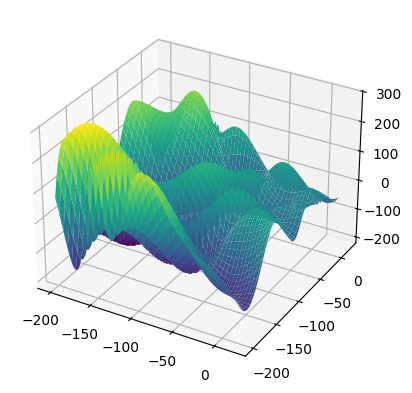

In [254]:
plot_function(f, -200, 20)

### Hill-Climbing

Moda: -155.03033
Variáveis que geram o resultado da moda: [array([ -66.62684686, -137.85846373])]


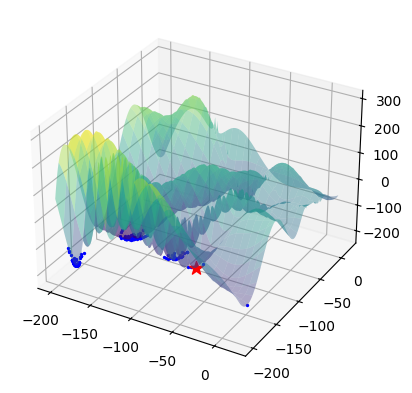

In [167]:
restricoes = np.array([[-200, 20], [-200, 20]])
x_axis = np.linspace(np.min(restricoes),np.max(restricoes),500)
X,Y = np.meshgrid(x_axis,x_axis)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f(X,Y),rstride=20,cstride=20,cmap='viridis',alpha=.4)
rodada = 0
variaveis = []
resultados = []
while rodada < 500:
    hill_climbing = HillClimbing(max_it=1000,epsilon=50,func=f,max_viz=50, restricoes=restricoes, max=False)
    variavel, resultado = hill_climbing.search()
    ax.scatter(variavel[0], variavel[1], f(variavel[0], variavel[1]), c='blue', s=2)
    variaveis.append(variavel)
    resultados.append(resultado)
    
    rodada += 1
resultados_arredondados = np.round(resultados, 5)
mode = numpy_mode(resultados_arredondados)
variaveis_dos_resultados = []
for i, resultado in enumerate(resultados_arredondados):
    if resultado == mode:
        variaveis_dos_resultados.append(variaveis[i])
print(f'Moda: {mode}')
print(f'Variáveis que geram o resultado da moda: {variaveis_dos_resultados}')
ax.scatter(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1], f(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1]), c='red',marker='*', s=100)

### Local Random Search - LRS

Moda: -26.6245
Variáveis que geram o resultado da moda: [array([ -6.21988299, -71.43526863])]


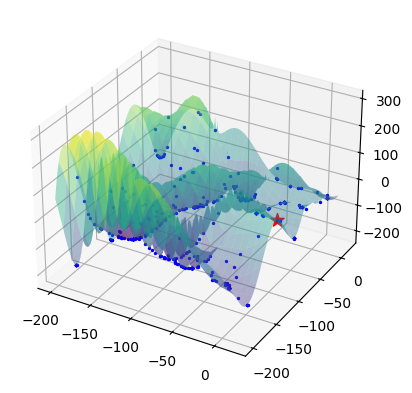

In [168]:
restricoes = np.array([[-200, 20], [-200, 20]])
x_axis = np.linspace(np.min(restricoes),np.max(restricoes),500)
X,Y = np.meshgrid(x_axis,x_axis)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f(X,Y),rstride=20,cstride=20,cmap='viridis',alpha=.4)
rodada = 0
variaveis = []
resultados = []
while rodada < 500:
    lrs = LocalRandomSearch(max_it=1000, sigma=0.1, func=f, restricoes=restricoes, tolerancia_maxima=10, max=False)
    variavel, resultado = lrs.search()
    ax.scatter(variavel[0], variavel[1], f(variavel[0], variavel[1]), c='blue', s=2)
    variaveis.append(variavel)
    resultados.append(resultado)
    
    rodada += 1
resultados_arredondados = np.round(resultados, 5)
mode = numpy_mode(resultados_arredondados)
variaveis_dos_resultados = []
for i, resultado in enumerate(resultados_arredondados):
    if resultado == mode:
        variaveis_dos_resultados.append(variaveis[i])
print(f'Moda: {mode}')
print(f'Variáveis que geram o resultado da moda: {variaveis_dos_resultados}')
ax.scatter(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1], f(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1]), c='red',marker='*', s=100)

### Global Random Search - GRS

Moda: -201.14383
Variáveis que geram o resultado da moda: [array([-165.23699719,  -97.79213018])]


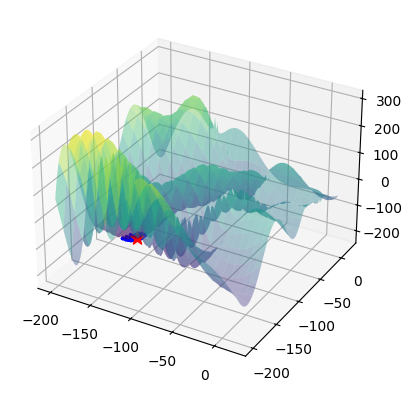

In [169]:
restricoes = np.array([[-200, 20], [-200, 20]])
x_axis = np.linspace(np.min(restricoes),np.max(restricoes),500)
X,Y = np.meshgrid(x_axis,x_axis)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f(X,Y),rstride=20,cstride=20,cmap='viridis',alpha=.4)
rodada = 0
variaveis = []
resultados = []
while rodada < 500:
    grs = GlobalRandomSearch(max_it=1000, func=f, restricoes=restricoes, tolerancia_maxima=1000, max=False)
    variavel, resultado = grs.search()
    ax.scatter(variavel[0], variavel[1], f(variavel[0], variavel[1]), c='blue', s=2)
    variaveis.append(variavel)
    resultados.append(resultado)
    
    rodada += 1
resultados_arredondados = np.round(resultados, 5)
mode = numpy_mode(resultados_arredondados)
variaveis_dos_resultados = []
for i, resultado in enumerate(resultados_arredondados):
    if resultado == mode:
        variaveis_dos_resultados.append(variaveis[i])
print(f'Moda: {mode}')
print(f'Variáveis que geram o resultado da moda: {variaveis_dos_resultados}')
ax.scatter(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1], f(variaveis_dos_resultados[0][0], variaveis_dos_resultados[0][1]), c='red',marker='*', s=100)
